In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def CSPSA(psi_est, nu_ite, fun_teor, fun,
          s=1, t=1/6, a=3, A=1, b = 0.1 ):
    """
    CSPSA
    IN
        psi_est: dim x n_par matrix. dim is de dimension of each vector, and n_par
                the number of guesses in parallel.
        nu_ite: int. Number of iterations of CSPSA.
        fun_teor: function. It is the known function, for example, the theoretical
                 fidelity between the unknown state of the system and the guess.
        fun: function. CSPSA uses this function for the optimization.
        s, t, a, A, b: parametros CSPSA
    OUT
        valor_optimo: real. Optimal value of fun finded by CSPSA.
    """

    n_par = int(psi_est.size/psi_est.shape[0])
    valor_optimo = np.zeros((n_par, nu_ite))
    valor_optimo[:,0] = fun_teor(psi_est)

    for k in range(0,nu_ite-1):
        valor_optimo[:,k+1], psi_est = (itCSPSA(psi_est/np.linalg.norm(psi_est, axis = 0),
                                       k, s, t, a, A, b, fun, fun_teor ))


    return valor_optimo

In [3]:
def itCSPSA(z_k,  k, s, t, a, A, b, fun, fun_teor):
    """iteracion de CSPSA
    IN
        z_k: dim x n_rep. Cada columna es un estimador de dimension dim.
        k: iteracion
        s, t, a, A, b: parametros CSPSA
        fun: funcion a optimizar
    OUT
        z_k: dim x n_rep. Estimador actualizado
        z_value: real. valor de fun en el estimador z_k
    """
    dim = z_k.shape[0]
    rep = int(z_k.size/z_k.shape[0])
    alpha = a/(k+1+A)**s
    beta = b/(k+1)**t
    delta = (1j)**(np.random.randint(1,5,(dim, rep))).reshape(2,rep)
    z_k_mas = z_k + beta*delta
    z_k_menos = z_k - beta*delta
    fun_k_mas = fun(z_k_mas)
    fun_k_menos = fun(z_k_menos)
    grad = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta.conj())
    z_k = z_k - alpha*grad
    z_value = fun_teor(z_k)
    return z_value, z_k

In [4]:
def SPSA(psi_est, nu_ite, fun_teor, fun,
          s=1, t=1/6, a=3, A=1, b = 0.1 ):
    """
    SPSA
    IN
        psi_est: dim x n_par matrix. dim is de dimension of each vector, and n_par
                the number of guesses in parallel.
        nu_ite: int. Number of iterations of SPSA.
        fun_teor: function. It is the known function, for example, the theoretical
                 fidelity between the unknown state of the system and the guess.
        fun: function. SPSA uses this function for the optimization.
        s, t, a, A, b: parametros SPSA
    OUT
        valor_optimo: real. Optimal value of fun finded by SPSA.
    """

    n_par = int(psi_est.size/psi_est.shape[0])
    valor_optimo = np.zeros((n_par, nu_ite))
    valor_optimo[:,0] = fun_teor(psi_est)

    for k in range(0,nu_ite-1):
        valor_optimo[:,k+1], psi_est = (itSPSA(psi_est/np.linalg.norm(psi_est, axis = 0),
                                       k, s, t, a, A, b, fun, fun_teor ))


    return valor_optimo

In [5]:
def itSPSA(z_k,  k, s, t, a, A, b, fun, fun_teor):
    """iteracion de SPSA
    IN
        z_k: dim x n_rep. Cada columna es un estimador de dimension dim.
        k: iteracion
        s, t, a, A, b: parametros SPSA
        fun: funcion a optimizar
    OUT
        z_k: dim x n_rep. Estimador actualizado
        z_value: real. valor de fun en el estimador z_k
    """
    dim = z_k.shape[0]
    rep = int(z_k.size/z_k.shape[0])
    alpha = a/(k+1+A)**s
    beta = b/(k+1)**t
    
    #Cambiamos un delta complejo por uno real (+1,-1)
    
    delta = (-1)**(np.random.randint(1,5,(dim, rep))).reshape(2,rep)
    delta_i = (-1)**(np.random.randint(1,5,(dim, rep))).reshape(2,rep)
    
    #Definimos parte real e imaginaria
    
    z_k_mas_r = np.real(z_k) + beta*delta
    z_k_mas_i = np.imag(z_k) + beta*delta_i
    z_k_menos_r = np.real(z_k) - beta*delta
    z_k_menos_i = np.imag(z_k) - beta*delta_i
    
    #Nuevo estado, normalizado
    
    z_k_mas = z_k_mas_r +1j*z_k_mas_i
    z_k_menos = z_k_menos_r+1j*z_k_menos_i
    
    z_k_mas = z_k_mas/np.linalg.norm(z_k_mas, axis=0)
    z_k_menos = z_k_menos/np.linalg.norm(z_k_menos, axis=0)
    
    fun_k_mas = fun(z_k_mas)
    fun_k_menos = fun(z_k_menos)
    
    #Gradiente real e imaginaria
    
    grad = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta)
    grad_i = np.divide(fun_k_mas - fun_k_menos, 2*beta*delta_i)
    
    z_k = z_k - alpha*grad - alpha*grad_i
    z_k = z_k/np.linalg.norm(z_k, axis=0)
    
    z_value = fun_teor(z_k)
    return z_value, z_k

In [6]:
# Definir Estado

def estado(dim, n_par):
    psi = (np.random.normal(loc=0.0, scale=1.0,
           size=(dim, n_par))
           + np.random.normal(loc=0.0, scale=1.0,
           size=(dim, n_par))*1j)
    psi = psi/np.linalg.norm(psi, axis=0)
    return psi

In [7]:
# Definir Hamiltoniano

def H_paul (A,B,C):
    pauli_x = np.array((((0, 1), (1, 0))))
    pauli_y = np.array((((0, -1j), (1j, 0))))
    pauli_z = np.array((((1, 0), (0, -1))))
    H_paul = A*pauli_x + B*pauli_y + C*pauli_z
    return H_paul

In [8]:
# Definir Valor de expectacion

def exp_H (psi_est, H):
    psi = np.matrix(psi_est)
    psi = psi/np.linalg.norm(psi, axis=0)
    psi_dagger = psi.getH()
    H = np.matrix(H)
    exp_H = psi_dagger*H*psi
    return exp_H

In [9]:
d = 2
nu_par = 1
NU_ITERACIONES = 800

#A = np.sqrt(0.3)
#B = np.sqrt(0.2)
#C = np.sqrt(0.5)
A = 1
B = 3
C = 5

In [10]:
psi_est = estado(d,nu_par)


In [11]:
H = H_paul(A,B,C)


In [12]:
fun = lambda x : exp_H(x, H)


In [13]:
# Ground-state Teórico

E = A**2 + B**2 + C**2

const1 = np.sqrt(1/2) * np.sqrt((A**2+B**2)/(E-C*(np.sqrt(E))))
const2 = (C-np.sqrt(E))/(A+1j*B)

#psi_teo = const1*np.matrix([[const2], [1]])
#fun(psi_teo)

Ground_teo = -(np.sqrt(A**2 + B**2 + C**2))
print(Ground_teo)

-5.916079783099616


In [14]:
Result_CSPSA = CSPSA(psi_est, NU_ITERACIONES, fun, fun)

/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


In [15]:
Result_SPSA = SPSA(psi_est, NU_ITERACIONES, fun, fun)

/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/dmunoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


In [16]:
error_CSPSA = abs(Result_CSPSA - Ground_teo)
error_SPSA = abs(Result_SPSA - Ground_teo)

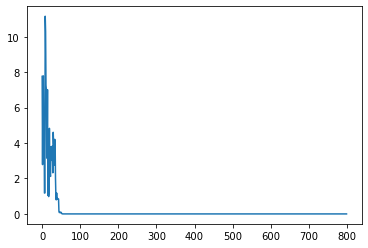

In [17]:
plt.plot(np.array(error_CSPSA[:]).T)
#plt.loglog(np.array(error_CSPSA[:]).T)

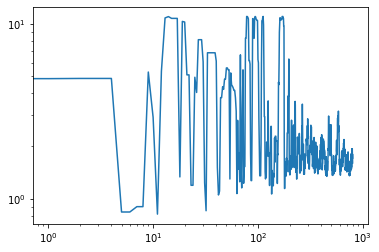

In [18]:
plt.loglog(np.array(error_SPSA[:]).T)
#plt.plot(np.array(error_SPSA[:]).T)

In [19]:
np.savetxt('prueba.txt', Result_SPSA, delimiter=',')
print(Result_SPSA)

[[ 1.85121044 -1.05767559 -1.04478919 -1.04478919 -1.04478919 -5.07589094
  -5.07589094 -5.01467966 -5.01467966 -0.61625878 -2.99356077 -5.0989612
  -0.55974903  4.88408205  5.07694061  4.82178523  4.82178523  4.82178523
  -4.58298188  4.40172976  4.31822536 -0.8099495  -0.8099495  -4.7219609
  -4.7219609  -0.96719118 -1.86535539  2.19533355  2.19533355  2.19533355
   0.14030093 -4.68302338 -5.06189678  0.9142474   0.9142474   0.9142474
   0.91332217  0.91240139  0.91148471  0.91148471  0.20667745 -4.40133586
  -4.86466083 -4.80965895 -2.13020563 -2.13020563 -1.54822228 -1.6973507
  -1.08971772 -1.08971772 -0.32138545 -0.32138545 -0.45577786 -0.45577786
  -4.61884874 -0.67787171 -1.43841332 -1.51122359 -1.61052187 -1.75363605
  -1.75363605 -2.14335842 -2.75421997 -4.84562956 -3.11036314 -4.43812541
  -4.0850708  -4.66609812  0.7285223  -4.4307444  -4.76253464 -2.65414782
  -0.46179628 -4.68976296 -4.38939463 -4.38939463  2.36190894  2.36190894
   5.09454937  5.09454937  4.97956874  4.7

In [20]:
np.savetxt('prueba.txt', Result_CSPSA, delimiter=',')
print(Result_CSPSA)

[[ 1.85121044 -3.13134389  0.79268325  1.87711387 -1.44170125 -0.05144307
  -4.7372697  -4.73738666  5.24591264  4.36231526  1.34557821  1.11753874
  -2.76311944 -2.10059487  1.09920947 -4.86521269 -1.28888584 -4.93727169
  -4.69335911 -1.08399462 -3.70562461 -3.71897505 -3.79826949 -2.11862004
  -2.40489619 -2.40564674 -2.89806606 -2.07164938 -3.59439381 -1.30772759
  -1.96166855 -2.24789034 -3.16589438 -1.70246777 -1.84827505 -3.91703315
  -4.92041361 -5.12295567 -4.73371531 -5.07950301 -5.02687337 -5.06843249
  -5.06954978 -5.07392232 -5.76750328 -5.84131514 -5.82504799 -5.81409231
  -5.85074822 -5.8304624  -5.83080163 -5.88083029 -5.90688965 -5.91351541
  -5.91565602 -5.91597306 -5.91596571 -5.91596442 -5.91596407 -5.91587339
  -5.91577362 -5.91580476 -5.91601196 -5.91603117 -5.91593522 -5.91600865
  -5.91605306 -5.91603081 -5.91598847 -5.91600251 -5.91597312 -5.91586457
  -5.91599184 -5.91606707 -5.91601627 -5.9160356  -5.91606201 -5.91606947
  -5.91605717 -5.91605492 -5.91606187 

In [21]:
print(psi_est)
fun(psi_est)

[[0.00445055-0.72671389j]
 [0.13968375-0.67257384j]]


matrix([[1.85121044-3.33066907e-16j]])